# About Dataset

Dataset Link : https://www.kaggle.com/datasets/mdismielhossenabir/sentiment-analysis?resource=download

This Dataset provides information about posts from various social media platforms(Facebook,instagram,twitter).Provided with the dataset are seven columns including the textual information of the particular post.

# About Sentiment Analysis algorithm

This project/algorithm focuses on developing a sentiment analysis system for social media posts. Using Natural language processing techniques the model segregates the new/future posts into different sentiment categories. The steps performed in the construction of the model is mentioned below

- Pandas library is used to load and read the dataset csv file and to convert it into a data frame for further analysis
- A small data analysis is performed to have a glance at the dataset
- Only features of interest were considered for feature engineering and model construction
- Features like date, time of tweet, and platform have nothing to do with the sentiment type of textual post, these features are ignored
- Here considered only text as a feature sample and sentiment as the target variable
- To feed the textual information to the model it has to be vectorized. Two techniques were used here to complete the task i.e. TFIDF(Term frequency-inverse document frequency) and Bag of Words.
- Reason to consider TFIDF as it reduces the importance of regular words and provides more vector score to rare but important words throughout the corpus
- Tried using a Bag of words as it is a simple technique for vectorization.
- Prior to performing the vectorization the entire dataset is split into train and test dataset using the train test split method from Scikit Learn (also for vectorization techniques and classification models)
- After performing the feature engineering i.e vectorization the vectors of the train text data is fed to the model along with its target variable.
- Naive Bayes Multi classifier is chosen as the classification algorithm for its in-depth segregation capabilities.
- After training the model a similar vectorization is performed to test the data set and fed to the model for prediction.
- Here Accuracy and Confusion matrix from Scikit Learn are used as Evaluation Metrics for the Model.

# Necessary Imports

In [96]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Reading the Dataset
dataset=pd.read_csv('sentiment_analysis.csv')

In [4]:
dataset

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram
...,...,...,...,...,...,...,...
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter


In [5]:
#Converting to pandas dataframe
df=pd.DataFrame(dataset)

# Glance at the Dataset

In [42]:
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB


- No missing values in the provided dataset

In [145]:
df['sentiment'].value_counts()

sentiment
neutral     199
positive    166
negative    134
Name: count, dtype: int64

- So three different types of sentiments are considered for segregation of text 

In [54]:
Neutral_texts=df[df['sentiment']=='neutral']['text']
pd.DataFrame(Neutral_texts)

,text
5,"Its night 2 am, feeling neutral"
7,Soooo high
8,Both of you
10,Love is something like E=MC^2 rules
14,Always somewhere I miss you where I have been
...,...
486,"back soon, need to run to the shops and cut th..."
487,I`m up. I have a plan to transform my bedroom ...
489,thats another sponsor
493,is home alone.. Doing hw


- Some of the Neutral texts

# Feature selection

Selecting the only columns of importance for feature engineering and model construnction

In [7]:
X=df['text'] #Entire text column

In [12]:
y=df['sentiment'] #target feature i.e Sentiment of the text

In [24]:
X

0                  What a great day!!! Looks like dream.
1         I feel sorry, I miss you here in the sea beach
2                                         Don't angry me
3      We attend in the class just for listening teac...
4                      Those who want to go, let them go
                             ...                        
494    According to , a quarter of families under six...
495        the plan to not spend money is not going well
496      uploading all my bamboozle pictures of facebook
497     congratulations ! you guys finish a month ear...
498     actually, I wish I was back in Tahoe.  I miss...
Name: text, Length: 499, dtype: object

In [25]:
y

0      positive
1      positive
2      negative
3      negative
4      negative
         ...   
494    negative
495    negative
496     neutral
497    positive
498    negative
Name: sentiment, Length: 499, dtype: object

# Data Split

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.40,random_state=42)

# Feature Engineering with TFIDF

- Using TFIDF to convert text to vectors considering the importance of each word(on the basis of it's occurence in each text and overall texts) 

In [60]:
tfidf=TfidfVectorizer(stop_words='english')

In [66]:
#Assiging the tfidf scores to words
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

# # Feature Engineering with BAG of WORDS

In [69]:
BOW=CountVectorizer(stop_words='english')

In [70]:
X_train_bow=BOW.fit_transform(X_train)
X_test_bow=BOW.transform(X_test)

# Model Construction

In [97]:
model=MultinomialNB()

In [98]:
model.fit(X_train_tfidf,y_train)

MultinomialNB()

# Model Evaluation for test Dataset

In [99]:
y_pred=model.predict(X_test_tfidf)

# Evaluation Metrics

In [108]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.65


In [109]:
cm=confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])

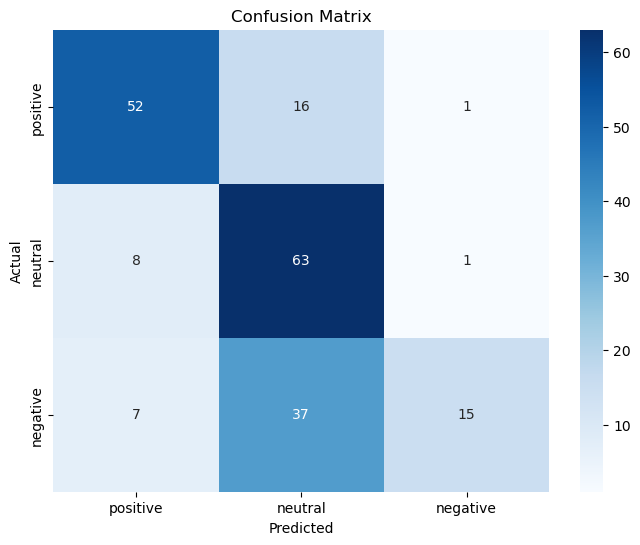

In [111]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True, cmap="Blues",xticklabels=['positive','neutral','negative'],yticklabels=['positive','neutral','negative'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Model Evaluation for new tweet

### Negative tweet

In [141]:
New_tweet=["The story log line is worst"]
New_tweet_tfidf=tfidf.transform(New_tweet)
Predicted_sentiment=model.predict(New_tweet_tfidf)
print(Predicted_sentiment)

['neutral']


### Positive Tweet

In [140]:
New_tweet2=["The story log line is good"]
New_tweet_tfidf2=tfidf.transform(New_tweet2)
Predicted_sentiment2=model.predict(New_tweet_tfidf2)
print(Predicted_sentiment2)

['positive']


### Neutral tweet

In [139]:
New_tweet3=["The story log line is average"]
New_tweet_tfidf3=tfidf.transform(New_tweet3)
Predicted_sentiment3=model.predict(New_tweet_tfidf3)
print(Predicted_sentiment3)

['neutral']


# Conclusion

- Looking at the Evaluation Metrics and also the model evaluation on new tweets it's clear that the model is able to predict the positive sentimental texts accurately
- But the model suffers From neutral and negative segregation.
- If we look at the number of samples for Negative posts,it's less than both the positive and neutral posts leading to an imbalanced dataset. The number is nearly half of the neutral postings. This might led to confusion while allocating the type of sentiment to the post.
- This can be handled by balancing the dataset i.e. nearly equal number of samples for each sentiment type.
- Better results can be achieved by ac